# Analiza podatkov o knjigah

Za projektno nalogo pri predmetu Programiranje 1 analiziram knjige s seznama najboljših knjig po mnenju bralcev. 
Odgovoriti želim na naslednja vprašanja:

- Ali se ocene knjig se skladajo z uvrstitvijo na seznamu in ali so ocene in vrednosti (score) odvisne med sabo?
- Koliko knjig imajo posamezni avtorji na seznamu? Ali je na seznam uvrščenih več knjig istega avtorja oziroma več knjig iz ene serije?
- Ali na seznamu prevladujejo knjige iz 21. stoletja? (Za odgovor na to vprašanje bom uporabila tudi seznam najboljših knjig 21. stoletja po mnenju bralcev)


## Nalaganje podatkov
Uvozimo knjižnico Pandas in naložimo podatke. Ker bodo tabele, ki jih bomo uporabljali velike, si omejimo prikaz na maksimalno 10 vrstic.

In [1]:
import pandas as pd

In [2]:
knjige = pd.read_csv('podatki_knjig/knjige_csv', thousands=',')
knjige_21 = pd.read_csv('podatki_knjig/knjige21_csv', thousands=',')

pd.options.display.max_rows = 10

In [3]:
knjige

,naslov,avtor,ocena,stevilo_ocen,score,stevilo_glasov
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.33,7840063,3428604,34907
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3101768,2932676,29968
2,Pride and Prejudice,Jane Austen,4.28,3876651,2442865,25095
3,To Kill a Mockingbird,Harper Lee,4.27,5609929,2292212,23412
4,The Book Thief,Markus Zusak,4.39,2326518,1652936,17015
...,...,...,...,...,...,...
995,Eleven Minutes,Paulo Coelho,3.71,168499,7103,86
996,A Bend in the Road,Nicholas Sparks,4.04,149793,7091,96
997,Eugene Onegin,Alexander Pushkin,4.10,59981,7088,99
998,"Everything, Everything",Nicola Yoon,4.00,563566,7081,80


Podatki so razvrščeni po vrednosti (score) izračunani na podlagi večih podatkov, med drugim številu ljudi, ki so zanjo glasovali in kako visoko so jo ocenili.
Če bi knjige razvrstili po oceni, bi bil vrstni red sledeč:

In [4]:
knjige.sort_values('ocena', ascending=False)

,naslov,avtor,ocena,stevilo_ocen,score,stevilo_glasov
151,The Addiction Manifesto,Jerry Weaver,4.88,1057,115064,1151
271,The Complete Calvin and Hobbes,Bill Watterson,4.80,38774,53543,670
614,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.75,290644,15224,162
387,"Harry Potter Series Box Set (Harry Potter, #1-7)",J.K. Rowling,4.74,276672,32373,391
233,"The Chain Between Worlds (The Lost Artefacts, #1)",Johnathon Nicolaou,4.67,865,67384,674
...,...,...,...,...,...,...
137,The Scarlet Letter,Nathaniel Hawthorne,3.43,817052,133926,1666
177,Heart of Darkness,Joseph Conrad,3.43,480319,92044,1138
826,Ethan Frome,Edith Wharton,3.43,120232,9402,138
910,The Turn of the Screw,Henry James,3.40,140060,8183,122


Ker je vrednost (score) odvisna od drugih podatkov kot ocena knjige, želimo poiskati razvrsitev knjig, ki najbolje zadostuje obema podatkoma. To poskusimo tako, da zaokrožimo ocene, nato pa knjige razvrstimo po zaokroženih ocenah in vrednosti (score).

In [5]:
zaokrozene_ocene = knjige['ocena'].round()
knjige['zaokrozena_ocena'] = zaokrozene_ocene
knjige.sort_values(by=['zaokrozena_ocena', 'score'], ascending=[False, False])

,naslov,avtor,ocena,stevilo_ocen,score,stevilo_glasov,zaokrozena_ocena
8,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.61,126309,1357408,14113,5.0
61,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,4.62,3421807,505117,5468,5.0
69,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.58,3734668,415887,4566,5.0
103,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,4.56,3340367,242176,2737,5.0
107,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.58,3005170,210911,2421,5.0
...,...,...,...,...,...,...,...
375,Beowulf,Unknown,3.47,285086,34545,494,3.0
401,زندگی مه آلود پریا,سید مرتضی مصطفوی,3.27,988,31007,312,3.0
797,Naked Lunch,William S. Burroughs,3.46,86650,10155,127,3.0
826,Ethan Frome,Edith Wharton,3.43,120232,9402,138,3.0


Odvisnost ocene in vrednosti (score) si lahko ogledamo še na druge načine:

<AxesSubplot: title={'center': 'Odvisnost vrednosti in ocen'}, xlabel='ocena', ylabel='score'>

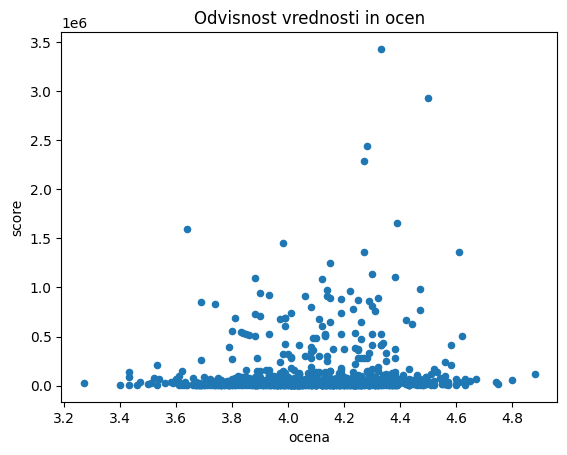

In [6]:
knjige.plot.scatter(x='ocena', y='score', title='Odvisnost vrednosti in ocen')

Zelo očitno je vidno, da ne velja, da imajo knjige z višjimi ocenami tudi višjo vrednost (score). Ker pa je zaradi nekaj zelo visokih vrednosti graf pri nižjih vrednostih ne pregleden, si ga lahko posebej ogledamo le za nižje.

<AxesSubplot: title={'center': 'Odvisnost vrednosti in ocene (pri vrednostih manjših od 1500000)'}, xlabel='ocena', ylabel='score'>

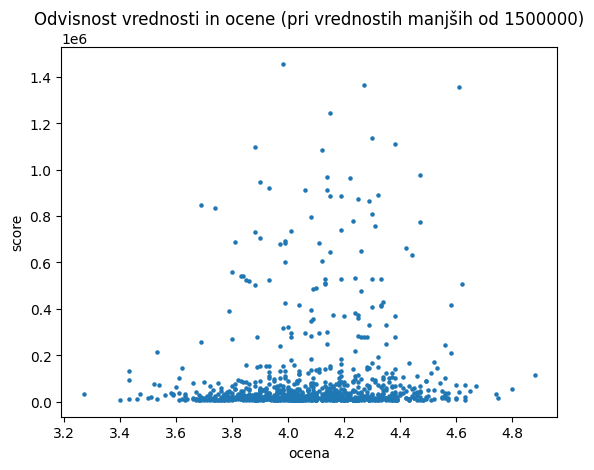

In [7]:
knjige_brez_najvisjih_vrednosti = knjige.score < 1500000
knjige[knjige_brez_najvisjih_vrednosti].plot.scatter(x='ocena', y='score', title='Odvisnost vrednosti in ocene (pri vrednostih manjših od 1500000)', s=5)

<AxesSubplot: title={'center': 'Odvisnost vrednosti in ocene (pri vrednostih večjih od 500000)'}, xlabel='ocena', ylabel='score'>

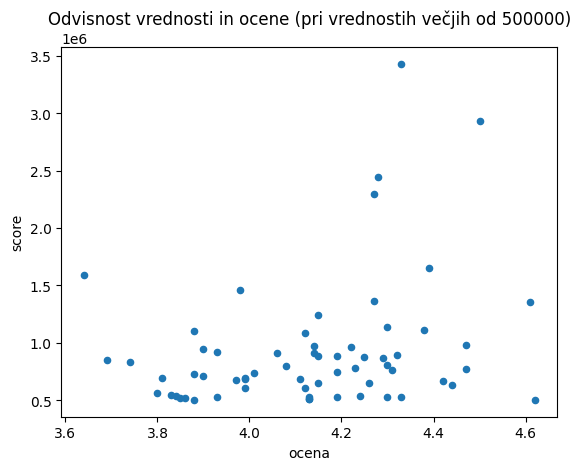

In [8]:
knjige_najvisjih_vrednosti = knjige.score > 500000
knjige[knjige_najvisjih_vrednosti].plot.scatter(x='ocena', y='score', title='Odvisnost vrednosti in ocene (pri vrednostih večjih od 500000)')

<AxesSubplot: xlabel='score'>

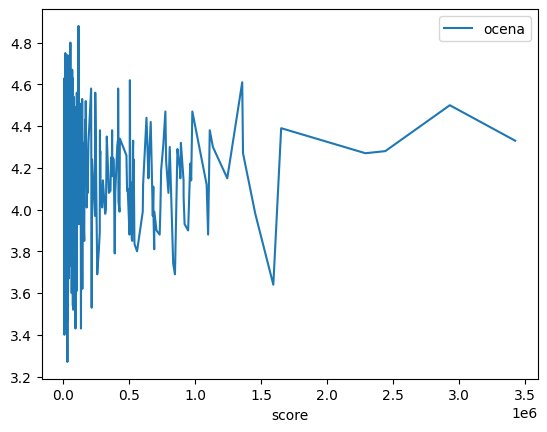

In [9]:
knjige.plot(x='score', y='ocena')

V primeru, da bi bila pri višjih ocenah vrednost višja, bi bil graf podoben ravni črti in ne lomljenki.

#### Knjige z najvišjimi ocenami očitno nimajo najvišje vrednosti in ocena ter vrednost med seboj nista linearno odvisni kot bi pričakovali. Iz tega sledi, da se ocene knjig ne skladajo z uvrstitvijo knjig na seznam.

## Avtorji
Podatke knjig lahko razvrstimo in združimo po avtorjih. Na ta način preverimo, ali imajo avtorji na tem seznamu več svojih knjig.

In [10]:
knjige.groupby("avtor", group_keys=True).apply(lambda x: x)

naslov  \
avtor                                                              
A.A. Milne            102  Winnie-the-Pooh (Winnie-the-Pooh, #1)   
A.S. Byatt            696                             Possession   
Abraham   Verghese    587                      Cutting for Stone   
Adam Long             157      The Compleat Works of Wllm Shkspr   
Adam Silvera          775               They Both Die at the End   
...                                                          ...   
Zora Neale Hurston    162           Their Eyes Were Watching God   
أحمد جمال الدين رمضان 542                            انتحار فاشل   
                      547                                 العصبي   
سید مرتضی مصطفوی      401                     زندگی مه آلود پریا   
                      960                        گم شده ای در مه   

                                           avtor  ocena  stevilo_ocen   score  \
avtor                                                                           
A.A. Milne            102             A.A. Milne   4.35        310966  246525   
A.S. Byatt            696             A.S. Byatt   3.89         77669   12499   
Abraham   Verghese    587     Abraham   Verghese   4.30        360337   16188   
Adam Long             157              Adam Long   4.46          8681  108483   
Adam Silvera          775           Adam Silvera   3.81        590750   10598   
...                                          ...    ...           ...     ...   
Zora Neale Hurston    162     Zora Neale Hurston   3.97        317907  103034   
أحمد جمال الدين رمضان 542  أحمد جمال الدين رمضان   4.56          2434   17850   
                      547  أحمد جمال الدين رمضان   4.63          2114   17655   
سید مرتضی مصطفوی      401       سید مرتضی مصطفوی   3.27           988   31007   
                      960       سید مرتضی مصطفوی   3.78           683    7587   

                           stevilo_glasov  zaokrozena_ocena  
avtor                                                        
A.A. Milne            102            2887               4.0  
A.S. Byatt            696             171               4.0  
Abraham   Verghese    587             203               4.0  
Adam Long             157            1248               4.0  
Adam Silvera          775             114               4.0  
...                                   ...               ...  
Zora Neale Hurston    162            1189               4.0  
أحمد جمال الدين رمضان 542             181               5.0  
                      547             179               5.0  
سید مرتضی مصطفوی      401             312               3.0  
                      960              77               4.0  

[1000 rows x 7 columns]

In [11]:
knjige_avtorji = knjige.groupby('avtor').size()
knjige_avtorji

avtor
A.A. Milne               1
A.S. Byatt               1
Abraham   Verghese       1
Adam Long                1
Adam Silvera             1
                        ..
Yevgeny Zamyatin         1
Yuval Noah Harari        1
Zora Neale Hurston       1
أحمد جمال الدين رمضان    2
سید مرتضی مصطفوی         2
Length: 591, dtype: int64

Dolžina zgornjega seznama je 591, kar pomeni da se avtorji v našem seznamu pojavljajo večkrat. Preverimo kateri avtorji imajo na seznamu največ knjig. Poglejmo si prvih 10 avtorjev na seznamu razporejenem po številu knjig:

In [12]:
knjige_avtorji.sort_values(ascending=False).head(10)

avtor
Stephen King           18
William Shakespeare    14
Sarah J. Maas          11
Cassandra Clare        11
Rick Riordan           11
Nicholas Sparks        10
J.K. Rowling            9
Charlaine Harris        9
Richelle Mead           8
C.S. Lewis              8
dtype: int64

<AxesSubplot: xlabel='avtor'>

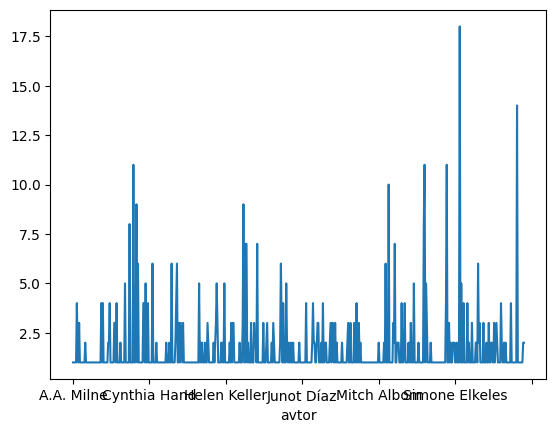

In [13]:
knjige_avtorji.plot()

Iz grafa je razvidno, da ima večina avtorjev na seznamu samo 1 knjigo, nekateri pa tudi več. Največ knig ima na seznamu Stephen King, ki jih ima kar 18, kar 6 avtorjev pa ima na njem 10 knjig ali več. Oglejmo si katere njune knjige so na seznamu:

In [14]:
def stephen_king(knj):
    return knj == "Stephen King"
king = knjige['avtor'].apply(stephen_king)
knjige[king]

,naslov,avtor,ocena,stevilo_ocen,score,stevilo_glasov,zaokrozena_ocena
66,The Stand,Stephen King,4.34,714731,428883,4631,4.0
92,It,Stephen King,4.25,1010406,282046,3035,4.0
94,The Shining,Stephen King,4.26,1367622,278324,3078,4.0
217,Misery,Stephen King,4.20,625657,73225,901,4.0
227,The Green Mile,Stephen King,4.47,293961,68999,860,4.0
...,...,...,...,...,...,...,...
714,On Writing: A Memoir of the Craft,Stephen King,4.33,266891,11933,158,4.0
728,Under the Dome,Stephen King,3.91,285240,11606,161,4.0
929,"Wizard and Glass (The Dark Tower, #4)",Stephen King,4.25,186201,7926,106,4.0
930,The Dead Zone,Stephen King,3.95,209692,7907,117,4.0


In [15]:
def rick_riordan(knj):
    return knj == "Rick Riordan"
riordan = knjige['avtor'].apply(rick_riordan)
knjige[riordan]

,naslov,avtor,ocena,stevilo_ocen,score,stevilo_glasov,zaokrozena_ocena
25,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.29,2646147,865853,9135,4.0
129,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.53,878605,142982,1630,5.0
159,The Battle of the Labyrinth (Percy Jackson and...,Rick Riordan,4.41,956291,104263,1222,4.0
167,The Titan's Curse (Percy Jackson and the Olymp...,Rick Riordan,4.36,915648,101792,1213,4.0
170,The Sea of Monsters (Percy Jackson and the Oly...,Rick Riordan,4.24,1010346,98627,1176,4.0
...,...,...,...,...,...,...,...
321,"The Son of Neptune (The Heroes of Olympus, #2)",Rick Riordan,4.42,525505,43716,550,4.0
325,"The Mark of Athena (The Heroes of Olympus, #3)",Rick Riordan,4.47,542424,42149,517,4.0
421,"The House of Hades (The Heroes of Olympus, #4)",Rick Riordan,4.56,359790,29070,361,5.0
588,"The Red Pyramid (The Kane Chronicles, #1)",Rick Riordan,4.10,372292,16150,217,4.0


Avtor Stephen King ima na seznamu tako samostojne knjige kot knjige iz serije, Rick Riordan pa knjige iz serije. Na podlagi tega sklepamo, da podobno velja tudi za ostale avtorje, ki imajo na seznamu več svojih knjig.

#### Na seznamu imajo nekateri avtorji več svojih knjig, od teh so to tako samostojne knjige kot knjige, ki so del skupne serije.

# Knjige iz 21. stoletja
Posebej smo naložili seznam najboljših knjig 21. stoletja. Želimo ugotoviti, ali se te knjige pojavljajo tudi na našem osnovnem seznamu (najboljših knjig).
Prikažimo ta seznam:

In [16]:
knjige_21

,naslov,avtor,ocena,stevilo_ocen,score,stevilo_glasov
0,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,4.62,3421807,407799,4123
1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.33,7840063,306661,3130
2,The Kite Runner,Khaled Hosseini,4.33,2915888,270178,2744
3,The Book Thief,Markus Zusak,4.39,2326518,265188,2701
4,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.58,3005170,228311,2351
...,...,...,...,...,...,...
995,"Twelve Sharp (Stephanie Plum, #12)",Janet Evanovich,4.16,96390,465,6
996,"Labyrinth (Languedoc, #1)",Kate Mosse,3.61,53559,465,6
997,Don't Judge a Girl by Her Cover (Gallagher Gir...,Ally Carter,4.21,69597,464,7
998,"Demonglass (Hex Hall, #2)",Rachel Hawkins,4.09,92239,463,9


Narediti moramo seznam (list) knjig iz 21. stoletja, da bomo s pomočjo njega poiskali knjige iz prvotnega seznam:

In [17]:
knjige_21_list = knjige_21.naslov.to_list()

In [18]:
def knjige_iz_21_stol(knj):
    if knj in knjige_21.naslov.to_list():
        return True
    else:
        return False

knjige_iz_21 = knjige['naslov'].apply(knjige_iz_21_stol)
knjige[knjige_iz_21]

,naslov,avtor,ocena,stevilo_ocen,score,stevilo_glasov,zaokrozena_ocena
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.33,7840063,3428604,34907,4.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3101768,2932676,29968,4.0
4,The Book Thief,Markus Zusak,4.39,2326518,1652936,17015,4.0
5,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.64,6083173,1593423,16240,4.0
9,The Fault in Our Stars,John Green,4.15,4687698,1243944,12889,4.0
...,...,...,...,...,...,...,...
977,"Unearthly (Unearthly, #1)",Cynthia Hand,4.02,125942,7312,95,4.0
979,"Breaking Dawn (The Twilight Saga, #4)",Stephenie Meyer,3.73,1584759,7283,97,4.0
985,The Complete Persepolis,Marjane Satrapi,4.39,164599,7229,102,4.0
989,Suzanne's Diary for Nicholas,James Patterson,4.17,147020,7186,98,4.0


#### Iz števila vrstic zgornje tabele vidimo, da je na našem seznamu 317 knjig iz 21. stoletja, to je 31,7 %. Moramo pa se zavedati, da verjetno knjig iz 21. stoletja s prvega seznama ni vseh na drugem seznamu s katerim smo iskani podatek preverjali. Zato ima verjetno naš rezultat manjšo napako.